
<h1 style="color: green; border: 2px solid green; padding: 10px; display: inline-block;">AI Based Medical Diagnosis For Spinal Scoliosis </h1>


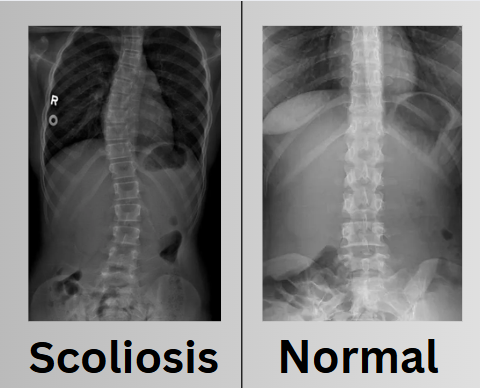

Scoliosis is a medical condition characterized by abnormal lateral curvature of the spine, affecting millions of people throughout the world. Early detection of scoliosis is important for good treatment and management. Conventional detection approaches are mostly based on manual observation of X-ray images, which in itself is laborious and prone to human error. The present project is concerned with the development of an AI system for automatic detection of scoliosis based on deep learning algorithms. 

A Convolutional Neural Network (CNN) classifies spine X-ray images into three different categories: Normal, Scoliosis, and Spondylosis. The model learns from a database of spine X-ray images with a test set accuracy of 90%. The system also utilizes Grad-CAM (gradient-weighted Class Activation Mapping) to provide visual explanations of the model's predictions and align them with human-level interpretation.

The project is a demonstration of AI working in medical imaging and aims to provide an early detection of scoliosis in a scalable manner. In the future, the aim is to enlarge the dataset, increase the accuracy of the model, and incorporate the system into clinical workflows.

<h1>Explanation<h1>

<h3>1. Importing The Necessary Libraries</h3>

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
import cv2

In [5]:
# Image settings
path = r'C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\ImagesOriginalSize'
im_width = 250
im_length = 950
IMAGE_SIZE = (im_width, im_length)
classes = [0, 1, 2]  # 0: Normal, 1: Scoliosis, 2: Spondylosis

In [6]:
# Count images in each category
def count_images(folder):
    return sum(1 for f in os.scandir(folder) if f.is_file())

In [7]:
# Define paths
normal_path = os.path.join(path, 'NormalFinal')
scoliosis_path = os.path.join(path, 'ScolFinal')
spondylosis_path = os.path.join(path, 'SpondFinal')

In [8]:
# Count images
normal_count = count_images(normal_path)
scoliosis_count = count_images(scoliosis_path)
spondylosis_count = count_images(spondylosis_path)

In [9]:
# Splitting data (80% train, 20% test)
train_split_normal = math.ceil(normal_count * 0.8)
train_split_scol = math.ceil(scoliosis_count * 0.8)
train_split_spon = math.ceil(spondylosis_count * 0.8)

In [10]:
# Function to load images
def get_data(folder, start, end, label):
    file_names = sorted(os.listdir(folder))  # Ensure sorted order
    images = []
    labels = []
    for idx in range(start, end):
        file_path = os.path.join(folder, file_names[idx])
        try:
            im = tf.io.read_file(file_path)
            im = tf.image.decode_image(im, channels=1)  # Handles multiple formats
            im = tf.image.resize(im, IMAGE_SIZE, method='lanczos5')
            im_array = im.numpy() / 255.0  # Normalize pixel values to [0,1]
            images.append(im_array)
            labels.append(classes[label])
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")
    return np.array(images), np.array(labels)

In [11]:
# Load images
x_norm_train, y_norm_train = get_data(normal_path, 0, train_split_normal, 0)
x_scol_train, y_scol_train = get_data(scoliosis_path, 0, train_split_scol, 1)
x_spon_train, y_spon_train = get_data(spondylosis_path, 0, train_split_spon, 2)

# Merge data
x_train = np.vstack((x_norm_train, x_scol_train, x_spon_train))
y_train = np.hstack((y_norm_train, y_scol_train, y_spon_train))

In [ ]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(im_width, im_length, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Softmax for multi-class classification
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train model with validation split
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
model.save("spine_classification_model.keras")

# Load the model
model = tf.keras.models.load_model("spine_classification_model.keras")


C:\Users\aksha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 337s 49s/step - accuracy: 0.4031 - loss: 7.4499 - val_accuracy: 0.0000e+00 - val_loss: 2.8107
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 232s 29s/step - accuracy: 0.7028 - loss: 0.7724 - val_accuracy: 0.0000e+00 - val_loss: 1.4133
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 510s 72s/step - accuracy: 0.6866 - loss: 0.8107 - val_accuracy: 0.0000e+00 - val_loss: 5.1949
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 218s 31s/step - accuracy: 0.7308 - loss: 0.6225 - val_accuracy: 0.0000e+00 - val_loss: 2.8745
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 306s 46s/step - accuracy: 0.7410 - loss: 0.5365 - val_accuracy: 0.0000e+00 - val_loss: 2.8033
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 330s 52s/step - accuracy: 0.8520 - loss: 0.4564 - val_accuracy: 0.0000e+00 - val_loss: 1.7480
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 201s 29s/step - accuracy: 0.7503 - loss: 0.4562 - val_accuracy: 0.0545 - val_loss: 1.9712
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 317s 49s/step - accuracy: 0.8838 - loss: 0.3278 - val_accu

In [22]:
# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 629ms/step - accuracy: 0.8987 - loss: 0.3206
Training Accuracy: 0.8125


In [13]:
# Merge data
x_train = np.vstack((x_norm_train, x_scol_train, x_spon_train))
y_train = np.hstack((y_norm_train, y_scol_train, y_spon_train))

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)  # Epoch numbers

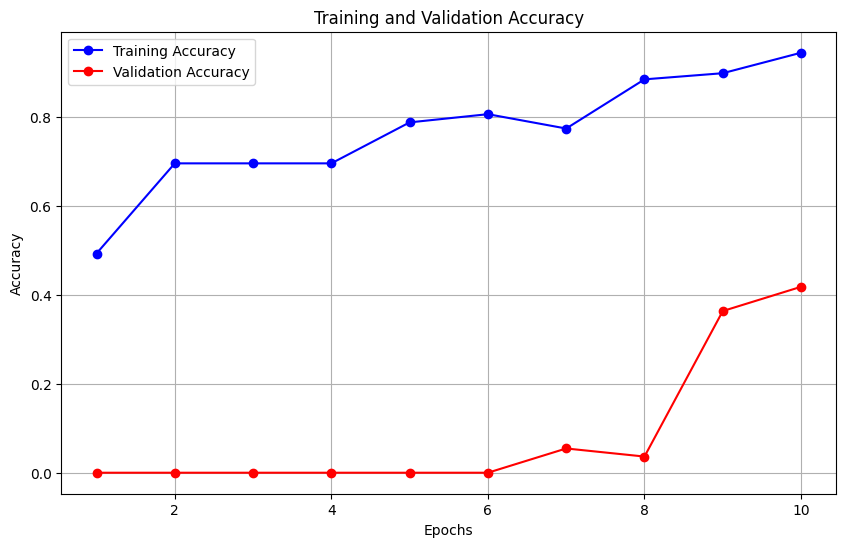

In [15]:
# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Add labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [16]:
# Load the model
model = tf.keras.models.load_model("spine_classification_model.keras")

In [17]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 948, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 474, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 472, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 236, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 234, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 883584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    56,549,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,816,139 (647.80 MB)

 Trainable params: 56,605,379 (215.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,210,760 (431.86 MB)

None


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 628ms/step


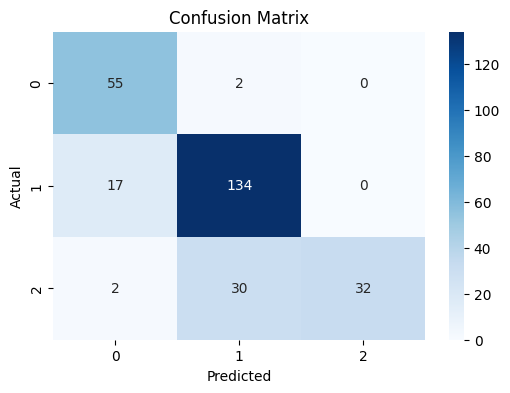

In [18]:
y_pred = model.predict(x_train)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_train, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Preprocess the image
def preprocess_image(img_path):
    """
    Preprocess the image:
    - Resize to (250, 950)
    - Convert to grayscale
    - Normalize pixel values to [0, 1]
    - Add batch and channel dimensions
    """
    img = Image.open(img_path).resize((950, 250))  # Resize to match model input shape (width, height)
    img = img.convert("L")  # Convert to grayscale
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return img_array

In [19]:
# Grad-CAM Visualization
def get_gradcam_heatmap(model, img_array, last_conv_layer_name="conv2d_2"):  # Use correct layer name
    grad_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        top_class = tf.argmax(predictions[0])
        loss = predictions[:, top_class]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1).numpy()[0]
    heatmap = np.maximum(heatmap, 0)  # ReLU
    heatmap /= np.max(heatmap)  # Normalize
    return heatmap

In [20]:
def overlay_heatmap(img_path, heatmap, alpha=0.6):
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img = img.resize((im_length, im_width))  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize

    heatmap = cv2.resize(heatmap, (im_length, im_width))
    heatmap = np.uint8(255 * heatmap)  # Convert to uint8
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply color map

    overlay = cv2.addWeighted(cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR), 1, heatmap, alpha, 0)
    # Show results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original X-ray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Grad-CAM Visualization")
    plt.axis("off")

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


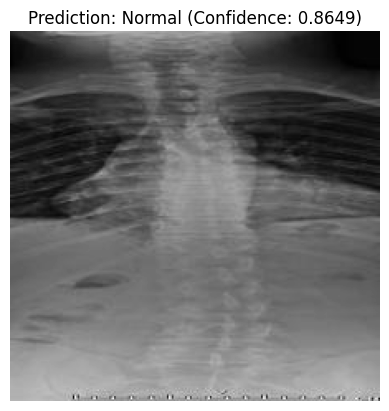

In [21]:
# Function to Make a Prediction
def predict_scoliosis(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    confidence = prediction[0][0]  # Get the confidence score

    # Apply threshold (Adjust if needed)
    result = "Normal" if confidence > 0.5 else "Scoliosis"

    # Display the image and prediction
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(f"Prediction: {result} (Confidence: {confidence:.4f})")
    plt.axis("off")
    plt.show()

# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Normal\N1,N,40,M_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)